In [1]:
# import lib 
import pandas as pd
import io
import requests
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from   sklearn.decomposition import PCA
import seaborn    as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl;mpl.style.use('seaborn')

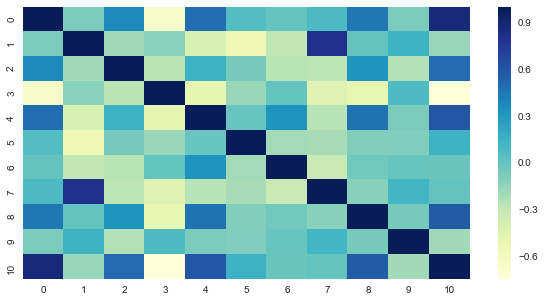

In [2]:
# read data from url
# https://archive.ics.uci.edu/ml/datasets/Glass+Identification
glass_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data',header=None)
plt.figure(figsize=(10,5));sns.heatmap(glass_data.corr(),cmap='YlGnBu');plt.show()

In [3]:
# view the data in numpy
gladd_data_np = np.asarray(glass_data).astype(np.float32)
print(gladd_data_np.shape)

gladd_data_2d     = np.hstack((gladd_data_np[:,1][:,None],gladd_data_np[:,7][:,None]))
gladd_data_2d_cen = gladd_data_2d - gladd_data_2d.mean(0)
print(gladd_data_2d.shape)

gladd_data_3d = gladd_data_np[:,1:4]
print(gladd_data_3d.shape)

(214, 11)
(214, 2)
(214, 3)


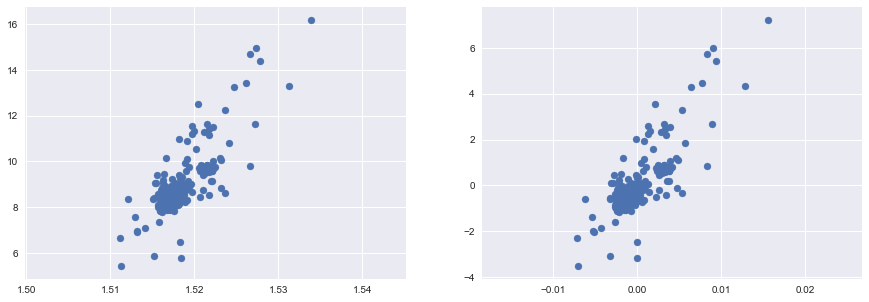

In [4]:
# view original data
plt.figure(figsize=(15,5))
plt.subplot(121); plt.scatter(gladd_data_2d[:,0],gladd_data_2d[:,1]);
plt.subplot(122); plt.scatter(gladd_data_2d_cen[:,0], gladd_data_2d_cen[:,1]); 
plt.show()

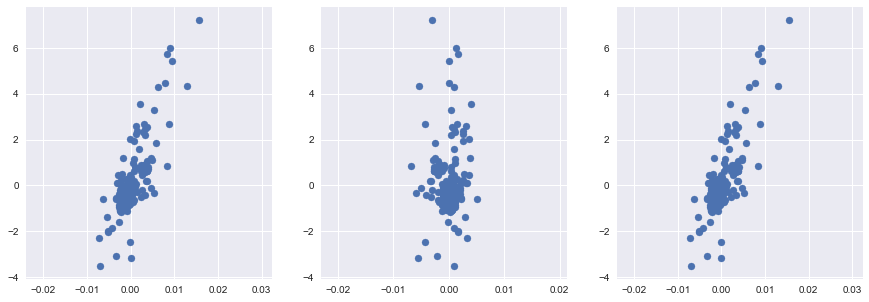

In [14]:
# perform pca on 2D
my_cov             = gladd_data_2d_cen.T @ gladd_data_2d_cen /(gladd_data_2d_cen.shape[0]-1)
eigvalue,eigvector = np.linalg.eigh(my_cov)
sorted_index       = np.argsort(eigvalue)
projection_vector  = eigvector[:,sorted_index]
projected_data     = gladd_data_2d_cen   @ projection_vector
recovered_data     = projected_data      @ np.linalg.inv(projection_vector)

plt.figure(figsize=(15,5))
plt.subplot(131); plt.scatter(gladd_data_2d_cen[:,0], gladd_data_2d_cen[:,1]); 
plt.subplot(132); plt.scatter(projected_data[:,0],projected_data[:,1]); 
plt.subplot(133); plt.scatter(recovered_data[:,0],recovered_data[:,1]);
plt.show()

[[-0.9999985   0.00172932]
 [ 0.00172932  0.9999985 ]]
[0.25086462 0.24913535]
[[-0.50086313  0.00086615]
 [ 0.00086316  0.49913386]]


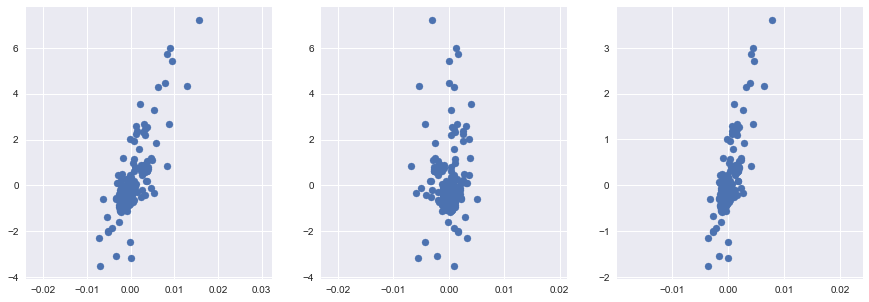

In [87]:
# recover but strangely
my_cov             = gladd_data_2d_cen.T @ gladd_data_2d_cen /(gladd_data_2d_cen.shape[0]-1)
eigvalue,eigvector = np.linalg.eigh(my_cov)
sorted_index       = np.argsort(eigvalue)
projection_vector  = eigvector[:,sorted_index]
projected_data     = gladd_data_2d_cen   @ projection_vector

inverse_vector = np.linalg.inv(projection_vector)
print(inverse_vector)

# 0 - respect to the coloum - each pair of x and y
# 1 - respect to the row    - each x's and y's
inverse_vector = inverse_vector*inverse_vector.std(1,keepdims=True)
print(inverse_vector.std(1))
print(inverse_vector)

recovered_data     = projected_data      @ inverse_vector

plt.figure(figsize=(15,5))
plt.subplot(131); plt.scatter(gladd_data_2d_cen[:,0], gladd_data_2d_cen[:,1]); 
plt.subplot(132); plt.scatter(projected_data[:,0],projected_data[:,1]); 
plt.subplot(133); plt.scatter(recovered_data[:,0],recovered_data[:,1]);
plt.show()

In [56]:
# import library
import tensorflow as tf
import numpy as np
import sys, os,cv2
from scipy.misc import imread,imresize
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from imgaug import augmenters as iaa
import imgaug as ia
from scipy.ndimage import zoom
from sklearn.utils import shuffle
import matplotlib.animation as animation
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs,make_moons,make_swiss_roll

plt.style.use('seaborn')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

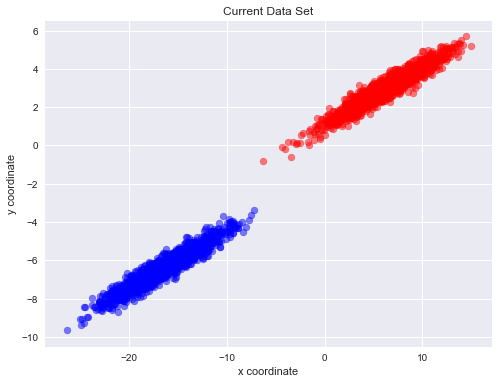

In [80]:
# load some data set
n_samples = 4000
X, y = make_blobs(n_samples=n_samples, random_state=123)
transformation = np.asarray([
    [3,1],
    [1,0]
])
X = X @ transformation
X = X - X.mean(0)
plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red',  alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.title('Current Data Set'); plt.ylabel('y coordinate'); plt.xlabel('x coordinate'); plt.grid(True)
plt.show()

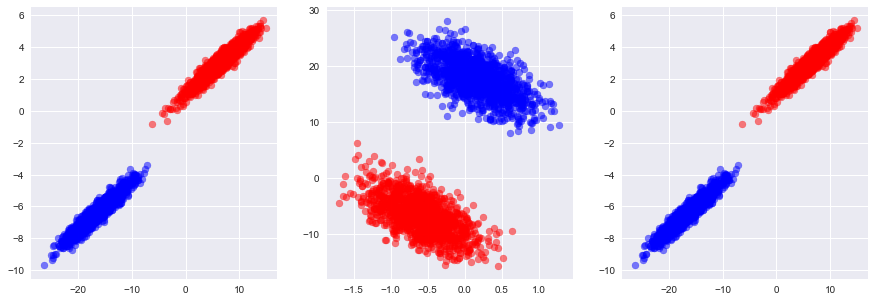

In [81]:
# perform pca on 2D
my_cov             = X.T @ X /(X.shape[0]-1)
eigvalue,eigvector = np.linalg.eigh(my_cov)
sorted_index       = np.argsort(eigvalue)
projection_vector  = eigvector[:,sorted_index]
projected_data     = X   @ projection_vector
recovered_data     = projected_data      @ np.linalg.inv(projection_vector)

plt.figure(figsize=(15,5))
plt.subplot(131); 
plt.scatter(X[y==0, 0], X[y==0, 1], color='red',  alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.subplot(132); 
plt.scatter(projected_data[y==0, 0], projected_data[y==0, 1], color='red',  alpha=0.5)
plt.scatter(projected_data[y==1, 0], projected_data[y==1, 1], color='blue', alpha=0.5)

plt.subplot(133); 
plt.scatter(recovered_data[y==0, 0], recovered_data[y==0, 1], color='red',  alpha=0.5)
plt.scatter(recovered_data[y==1, 0], recovered_data[y==1, 1], color='blue', alpha=0.5)

plt.show()

[[ 0.35280162 -0.93569814]
 [-0.93569814 -0.35280162]]


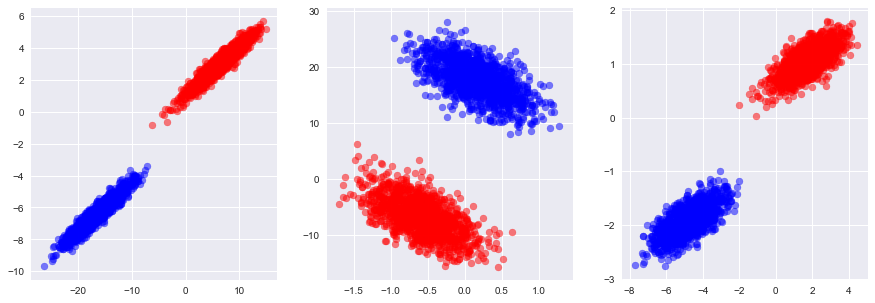

In [96]:
# perform pca on 2D
my_cov             = X.T @ X /(X.shape[0]-1)
eigvalue,eigvector = np.linalg.eigh(my_cov)
sorted_index       = np.argsort(eigvalue)
projection_vector  = eigvector[:,sorted_index]
projected_data     = X   @ projection_vector

projection_vector  = np.linalg.inv(projection_vector)
print(projection_vector)
projection_vector  = projection_vector * projection_vector.std(1,keepdims=True)
recovered_data     = projected_data      @ projection_vector

plt.figure(figsize=(15,5))
plt.subplot(131); 
plt.scatter(X[y==0, 0], X[y==0, 1], color='red',  alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
    
plt.subplot(132); 
plt.scatter(projected_data[y==0, 0], projected_data[y==0, 1], color='red',  alpha=0.5)
plt.scatter(projected_data[y==1, 0], projected_data[y==1, 1], color='blue', alpha=0.5)

plt.subplot(133); 
plt.scatter(recovered_data[y==0, 0], recovered_data[y==0, 1], color='red',  alpha=0.5)
plt.scatter(recovered_data[y==1, 0], recovered_data[y==1, 1], color='blue', alpha=0.5)

plt.show()

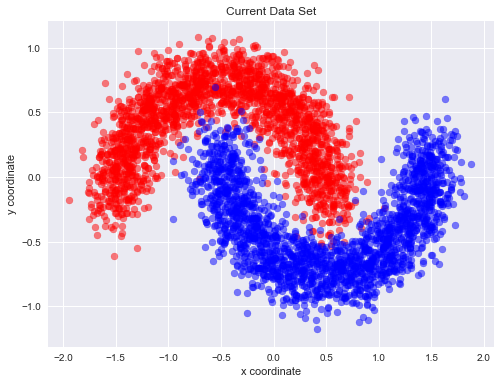

In [105]:
# load some data set
n_samples = 4000
X, y = make_moons(n_samples=n_samples, random_state=13,noise=0.15)
X    = X - X.mean(0,keepdims=True)
plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red',  alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.title('Current Data Set'); plt.ylabel('y coordinate'); plt.xlabel('x coordinate'); plt.grid(True)
plt.show()

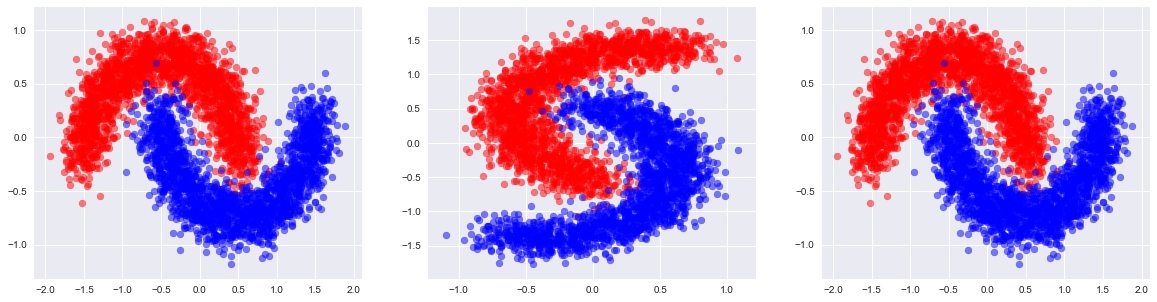

In [109]:
# perform pca on 2D
my_cov             = X.T @ X /(X.shape[0]-1)
eigvalue,eigvector = np.linalg.eigh(my_cov)
sorted_index       = np.argsort(eigvalue)
projection_vector  = eigvector[:,sorted_index]
projected_data     = X   @ projection_vector
recovered_data     = projected_data      @ np.linalg.inv(projection_vector)

plt.figure(figsize=(20,5))
plt.subplot(131); 
plt.scatter(X[y==0, 0], X[y==0, 1], color='red',  alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.subplot(132); 
plt.scatter(projected_data[y==0, 0], projected_data[y==0, 1], color='red',  alpha=0.5)
plt.scatter(projected_data[y==1, 0], projected_data[y==1, 1], color='blue', alpha=0.5)

plt.subplot(133); 
plt.scatter(recovered_data[y==0, 0], recovered_data[y==0, 1], color='red',  alpha=0.5)
plt.scatter(recovered_data[y==1, 0], recovered_data[y==1, 1], color='blue', alpha=0.5)

plt.show()

[[-0.32270455 -0.94649975]
 [-0.94649975  0.32270455]]


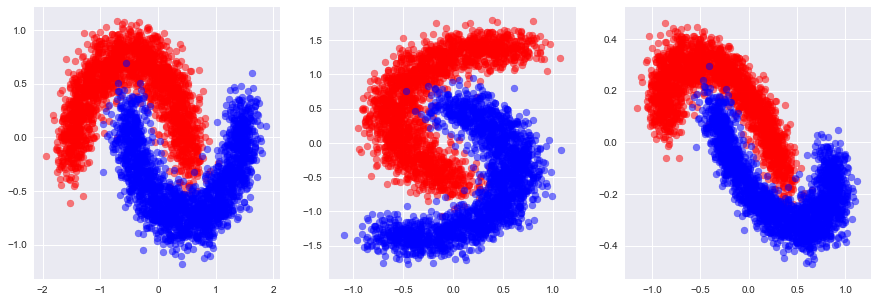

In [110]:
# perform pca on 2D
my_cov             = X.T @ X /(X.shape[0]-1)
eigvalue,eigvector = np.linalg.eigh(my_cov)
sorted_index       = np.argsort(eigvalue)
projection_vector  = eigvector[:,sorted_index]
projected_data     = X   @ projection_vector

projection_vector  = np.linalg.inv(projection_vector)
print(projection_vector)
projection_vector  = projection_vector * projection_vector.std(1,keepdims=True)
recovered_data     = projected_data      @ projection_vector

plt.figure(figsize=(15,5))
plt.subplot(131); 
plt.scatter(X[y==0, 0], X[y==0, 1], color='red',  alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
    
plt.subplot(132); 
plt.scatter(projected_data[y==0, 0], projected_data[y==0, 1], color='red',  alpha=0.5)
plt.scatter(projected_data[y==1, 0], projected_data[y==1, 1], color='blue', alpha=0.5)

plt.subplot(133); 
plt.scatter(recovered_data[y==0, 0], recovered_data[y==0, 1], color='red',  alpha=0.5)
plt.scatter(recovered_data[y==1, 0], recovered_data[y==1, 1], color='blue', alpha=0.5)

plt.show()

[[0.3797988  0.05845493]
 [0.05845493 2.63297306]]


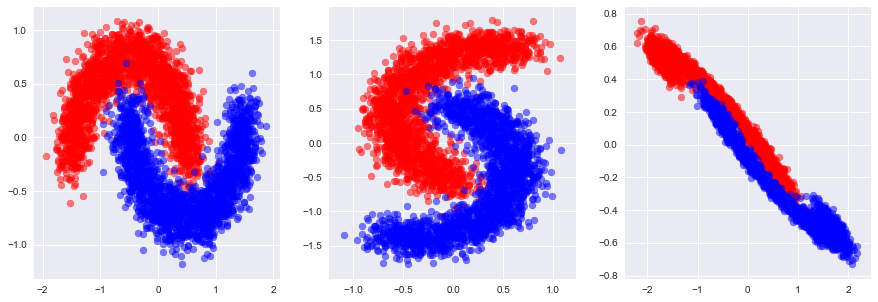

In [124]:
# perform pca on 2D
my_cov             = X.T @ X /(X.shape[0]-1)
eigvalue,eigvector = np.linalg.eigh(my_cov)
sorted_index       = np.argsort(eigvalue)
projection_vector  = eigvector[:,sorted_index]
projected_data     = X   @ projection_vector

projection_vector  = np.linalg.inv(projection_vector)
projection_vector2 = np.exp(3*projection_vector)
projection_vector  = projection_vector * projection_vector2.std(1,keepdims=True)
recovered_data     = projected_data      @ projection_vector

plt.figure(figsize=(15,5))
plt.subplot(131); 
plt.scatter(X[y==0, 0], X[y==0, 1], color='red',  alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
    
plt.subplot(132); 
plt.scatter(projected_data[y==0, 0], projected_data[y==0, 1], color='red',  alpha=0.5)
plt.scatter(projected_data[y==1, 0], projected_data[y==1, 1], color='blue', alpha=0.5)

plt.subplot(133); 
plt.scatter(recovered_data[y==0, 0], recovered_data[y==0, 1], color='red',  alpha=0.5)
plt.scatter(recovered_data[y==1, 0], recovered_data[y==1, 1], color='blue', alpha=0.5)

plt.show()

[[-0.32270455  0.001     ]
 [-0.94649975  0.001     ]]


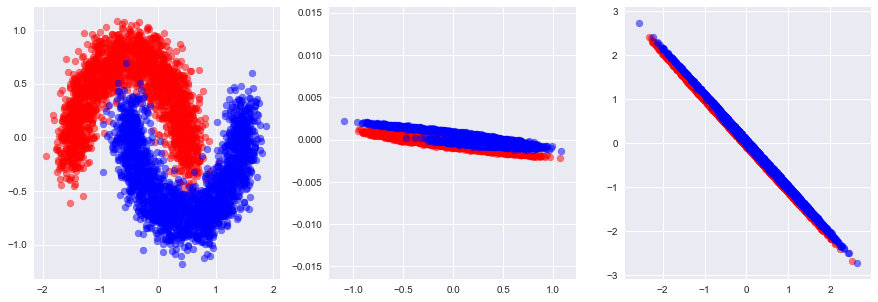

In [157]:
my_cov             = X.T @ X /(X.shape[0]-1)
eigvalue,eigvector = np.linalg.eigh(my_cov)
sorted_index       = np.argsort(eigvalue)
projection_vector  = eigvector[:,sorted_index]
projection_vector[:,1:2]  = 0.001
print(projection_vector)
projected_data     = X   @ projection_vector


projection_vector  = np.linalg.inv(projection_vector+0.1)
projection_vector2 = np.exp(3*projection_vector)
projection_vector  = projection_vector * projection_vector.std(1,keepdims=True)
recovered_data     = projected_data      @ projection_vector

plt.figure(figsize=(15,5))
plt.subplot(131); 
plt.scatter(X[y==0, 0], X[y==0, 1], color='red',  alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
    
plt.subplot(132); 
plt.scatter(projected_data[y==0, 0], projected_data[y==0, 1], color='red',  alpha=0.5)
plt.scatter(projected_data[y==1, 0], projected_data[y==1, 1], color='blue', alpha=0.5)

plt.subplot(133); 
plt.scatter(recovered_data[y==0, 0], recovered_data[y==0, 1], color='red',  alpha=0.5)
plt.scatter(recovered_data[y==1, 0], recovered_data[y==1, 1], color='blue', alpha=0.5)

plt.show()